In [192]:
from sklearn import datasets
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Iris e Wine dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
X = X_train
y = y_train
print(len(y_train))


135


In [193]:
def distancia(classi, amostra):
    maior = float('-inf')
    classe = 0
    tam = []
    somatorio = 0
    for y in range(len(classi)):
        dista=0
        for z in range(len(amostra)):
            dista+=(amostra[z]-classi[y][z])**2
        dista = dista**0.5
        somatorio+=dista
        tam.append(dista)
    for y in range(len(classi)):
        dista = math.pow(tam[y],-1/2)/math.pow(somatorio,-1/2)
        if(dista>maior):
            maior = dista
            classe = y
    return classe

In [194]:
pertencimento = []
previsto = []
centros = [X[0]]
nomeCentro = [y[0]]
centrolAtual = 0
pertencimento.append(0)
previsto.append(0)
cont=0
for x in range(1,int(len(X))):
    classe = distancia(centros,X[x])
    previsto.append(classe)
    if(classe!=y[x]):
        cont+=1
    try:
        pertencimento.append(nomeCentro.index(y[x]))
        centrolAtual = nomeCentro.index(y[x])
    except:
        centros.append(X[x])
        nomeCentro.append(y[x])
        pertencimento.append(max(pertencimento)+1)
        centrolAtual = max(pertencimento)
    for k in range(len(centros[centrolAtual])):
        centros[centrolAtual][k] = ((centros[centrolAtual][k]*(pertencimento.count(centrolAtual)-1))+X[x][k])/pertencimento.count(centrolAtual)

In [195]:
print(cont)

[array([5.01875   , 3.43541667, 1.46041667, 0.24583333]), array([5.95227273, 2.76590909, 4.26590909, 1.32272727]), array([6.58372093, 2.96744186, 5.57674419, 2.03255814])]
11


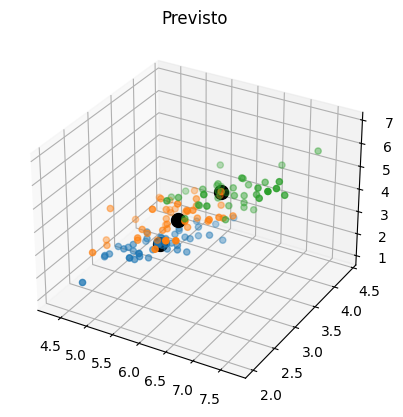

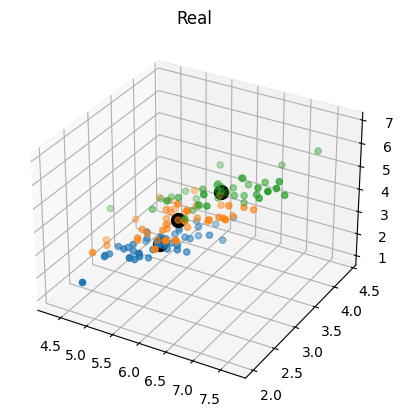

In [196]:
pontos = [[[],[],[]],[[],[],[]],[[],[],[]]]
for x in range(len(previsto)):
    if nomeCentro[previsto[x]] == 0:
        pontos[0][0].append(X[x][0])
        pontos[0][1].append(X[x][1])
        pontos[0][2].append(X[x][2])
    elif nomeCentro[previsto[x]] == 1:
        pontos[1][0].append(X[x][0])
        pontos[1][1].append(X[x][1])
        pontos[1][2].append(X[x][2])
    elif nomeCentro[previsto[x]] == 2:
        pontos[2][0].append(X[x][0])
        pontos[2][1].append(X[x][1])
        pontos[2][2].append(X[x][2])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pontos[0][0],pontos[0][1],pontos[0][2])
ax.scatter(pontos[1][0],pontos[1][1],pontos[1][2])
ax.scatter(pontos[2][0],pontos[2][1],pontos[2][2])  
for x in centros:
    ax.scatter(x[0],x[1],x[2], label = 'Pontos', color = 'black', marker = 'o', s = 100)    
plt.title("Previsto")
plt.show()

pontos = [[[],[],[]],[[],[],[]],[[],[],[]]]
for x in range(len(pertencimento)):
    if nomeCentro[pertencimento[x]] == 0:
        pontos[0][0].append(X[x][0])
        pontos[0][1].append(X[x][1])
        pontos[0][2].append(X[x][2])
    elif nomeCentro[pertencimento[x]] == 1:
        pontos[1][0].append(X[x][0])
        pontos[1][1].append(X[x][1])
        pontos[1][2].append(X[x][2])
    elif nomeCentro[pertencimento[x]] == 2:
        pontos[2][0].append(X[x][0])
        pontos[2][1].append(X[x][1])
        pontos[2][2].append(X[x][2])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pontos[0][0],pontos[0][1],pontos[0][2])
ax.scatter(pontos[1][0],pontos[1][1],pontos[1][2])
ax.scatter(pontos[2][0],pontos[2][1],pontos[2][2])  
for x in centros:
    ax.scatter(x[0],x[1],x[2], label = 'Pontos', color = 'black', marker = 'o', s = 100)    
plt.title("Real")
plt.show()

Este algoritmo foi testado tabém com a base de dados iris, porém os valores de erros variaram muito de acordo com as execuções, não entendi o motivo disto acontecer, pode ser uma caracteristica da base.
Acima está a base de dados com os valores previstos e com os valores reais, nesta execução foi gerado apenas 11 erros, neste caso se obteve bons valores apartir do algoritmo.